In [227]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

import math
import re

import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np

from datetime import date, timedelta
import plotly.offline as ply
import plotly.graph_objs as go
from plotly.tools import make_subplots
import plotly.express as px

ply.init_notebook_mode(connected=True)

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling


import plotly.graph_objects as go
%matplotlib inline

# Data pre-processing

Загружаем и смотрим на данные

In [228]:
data = pd.read_csv("Train.csv", header = 0)
# test_data = pd.read_csv("Submission.csv", header = 0)

In [315]:
data.head()

name  \
0       Guest Quarters on Capitol Hill   
1  Private oasis. Top floor w/ 2 decks   
2    People's Place -Convention Center   
3                           M St Apt C   
4   Columbia Heights Rm w/Private Bath   

                                             summary  \
0  The  Guest Quarters on Capitol Hill is a garde...   
1  Top two floors, two bathrooms and two decks. M...   
2                                                NaN   
3  Inspired by MidEast styles. 1 full bed, 1 air ...   
4  Enjoy our dressed up guest room in the heart o...   

                                         description  \
0  The  Guest Quarters on Capitol Hill is a garde...   
1  Top two floors, two bathrooms and two decks. M...   
2  This 2 bedroom apartment is on the ground floo...   
3  Inspired by MidEast styles. 1 full bed, 1 air ...   
4  Enjoy our dressed up guest room in the heart o...   

                               neighborhood_overview  \
0  the convenience and charm of being on Capitol ...   
1  Adams Morgan is the most vibrant part of DC wh...   
2                                                NaN   
3  I love this neighborhood! Mt. Vernon is the ve...   
4                                                NaN   

                                             transit  host_since  \
0  The Red Line and the Blue Line Metros are with...  2013-08-14   
1  There is so many transportation options. Acros...  2012-01-23   
2                                                NaN  2009-10-31   
3  The Mt. Vernon Sq metro is just 2 blocks away ...  2013-04-23   
4                                                NaN  2012-07-09   

                                     host_location  \
0  Washington, District of Columbia, United States   
1  Washington, District of Columbia, United States   
2              Berkeley, California, United States   
3         San Francisco, California, United States   
4  Washington, District of Columbia, United States   

                                          host_about host_response_rate  \
0  We are a reservation service for many DC area ...                98%   
1  I have lived in DC for that past five years, b...               100%   
2  A professional photo editor and photographer l...                97%   
3  I am from Oakland, California and I like to li...                92%   
4  I'm a tree-hugger at heart. My wife is an arti...               100%   

  host_acceptance_rate  ... review_scores_accuracy review_scores_cleanliness  \
0                  52%  ...                   10.0                      10.0   
1                 100%  ...                    9.0                       9.0   
2                 100%  ...                    8.0                       8.0   
3                 100%  ...                    9.0                       8.0   
4                  75%  ...                    9.0                       9.0   

  review_scores_checkin review_scores_communication review_scores_location  \
0                  10.0                        10.0                   10.0   
1                  10.0                         9.0                   10.0   
2                   9.0                         9.0                    9.0   
3                   8.0                         8.0                    9.0   
4                  10.0                        10.0                    8.0   

  review_scores_value instant_bookable cancellation_policy  \
0                 8.0                f              strict   
1                 9.0                f              strict   
2                 9.0                f              strict   
3                 9.0                f            flexible   
4                 9.0                f            moderate   

  calculated_host_listings_count reviews_per_month  
0                             41              0.18  
1                              1              0.41  
2                              3              1.09  
3                              4              4.34

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            3013 non-null   object 
 1   summary                         2799 non-null   object 
 2   description                     3012 non-null   object 
 3   neighborhood_overview           1989 non-null   object 
 4   transit                         2089 non-null   object 
 5   host_since                      3013 non-null   object 
 6   host_location                   3008 non-null   object 
 7   host_about                      2238 non-null   object 
 8   host_response_rate              2664 non-null   object 
 9   host_acceptance_rate            2520 non-null   object 
 10  host_neighbourhood              2799 non-null   object 
 11  host_verifications              3013 non-null   object 
 12  neighbourhood_cleansed          30

Датасет содержит 45 переменных разных типов (присутствуют текстовые,числовые, категориальные и булевые переменные). Также во многих переменных значительная доля пропущеных значений. Для удобства составлена описательная таблица ниже (отсортировано по кол-ву пропусков): 

In [5]:
info = []
for column in data.columns:
        vals = {"col": column,
                "na_count": data[column].isna().sum(),
               "nunique": data[column].nunique(),
               "unique": data[column].unique(),
                "type": data[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "na_count", ascending = False)

col  na_count  nunique  \
29                    cleaning_fee      1127       81   
3            neighborhood_overview      1024     1831   
4                          transit       924     1932   
7                       host_about       775     1590   
36       review_scores_cleanliness       707        9   
37           review_scores_checkin       707        8   
35          review_scores_accuracy       706        7   
40             review_scores_value       704        8   
38     review_scores_communication       704        8   
39          review_scores_location       704        7   
34            review_scores_rating       703       39   
44               reviews_per_month       672      556   
9             host_acceptance_rate       493       68   
8               host_response_rate       349       59   
1                          summary       214     2709   
10              host_neighbourhood       214      125   
23                       bathrooms        25       13   
24                        bedrooms        13        9   
25                            beds        10       13   
15                         zipcode         8       35   
6                    host_location         5      134   
2                      description         1     2975   
20                   property_type         1       11   
42             cancellation_policy         0        4   
43  calculated_host_listings_count         0       18   
30                 guests_included         0       14   
33               number_of_reviews         0      156   
32                  maximum_nights         0       90   
31                  minimum_nights         0       17   
41                instant_bookable         0        2   
0                             name         0     2992   
28                           price         0      268   
27                       amenities         0     2437   
26                        bed_type         0        5   
21                       room_type         0        3   
19                         country         0        1   
18                    country_code         0        1   
17                  smart_location         0       14   
16                          market         0        1   
14                           state         0        5   
13                            city         0       14   
12          neighbourhood_cleansed         0       39   
11              host_verifications         0      102   
5                       host_since         0     1252   
22                    accommodates         0       16   

                                               unique     type  
29  [nan, $50.00, $75.00, $35.00, $90.00, $20.00, ...   object  
3   [the convenience and charm of being on Capitol...   object  
4   [The Red Line and the Blue Line Metros are wit...   object  
7   [We are a reservation service for many DC area...   object  
36  [10.0, 9.0, 8.0, nan, 4.0, 7.0, 6.0, 5.0, 3.0,...  float64  
37     [10.0, 9.0, 8.0, nan, 6.0, 7.0, 5.0, 3.0, 2.0]  float64  
35          [10.0, 9.0, 8.0, nan, 6.0, 2.0, 7.0, 4.0]  float64  
40     [8.0, 9.0, 10.0, nan, 7.0, 6.0, 2.0, 4.0, 5.0]  float64  
38     [10.0, 9.0, 8.0, nan, 6.0, 4.0, 3.0, 7.0, 5.0]  float64  
39          [10.0, 9.0, 8.0, nan, 6.0, 7.0, 4.0, 5.0]  float64  
34  [90.0, 83.0, 84.0, 100.0, nan, 88.0, 89.0, 98....  float64  
44  [0.18, 0.41, 1.09, 4.34, 0.09, 1.0, nan, 3.84,...  float64  
9   [52%, 100%, 75%, 90%, nan, 88%, 94%, 50%, 99%,...   object  
8   [98%, 100%, 97%, 92%, nan, 90%, 58%, 89%, 30%,...   object  
1   [The  Guest Quarters on Capitol Hill is a gard...   object  
10  [LeDroit Park, Adams Morgan, Bedford-Stuyvesan...   object  
23  [1.0, 1.5, 2.5, 2.0, 0.0, 3.5, 4.0, nan, 3.0, ...  float64  
24  [1.0, 2.0, 0.0, 3.0, nan, 5.0, 4.0, 6.0, 8.0, ...  float64  
25  [1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 7.0, nan, 8.0, ...  float64  
15  [20002, 20009, 20001, 20020, 20010, 20018, 200...   object  
6   [Washington, District of Columbia, Unit

In [316]:
df = data.copy()

## Описание переменных и подготовка


### Текстовые:

- summary 
- description
- name - будет удалена (не информативная переменная).
- neighborhood_overview, transit, host_about - имеют очень много пропусков. 

<i>В датасет для построения регрессионных моделей, моделей деревьев решений и Regression Neural Network текстовые переменные не будут включены. </i>


In [317]:
text_cols = ['neighborhood_overview', 'transit', 'host_about', 'summary', 'description']

### Числовые:
<i> Переменные содержат большое количество пропусков. Также из корреляционной матрицы видно, что они слабо коррелируют с ценой, поэтому будут удалены </i>

- review_scores_cleanliness
- review_scores_checkin
- review_scores_accuracy
- review_scores_value
- review_scores_communication
- review_scores_location
- review_scores_rating
- reviews_per_month 
- host_acceptance_rate 
- host_response_rate 

In [318]:
reviews = ['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_accuracy', 'review_scores_value'
          , 'review_scores_communication','review_scores_location', 'reviews_per_month', 'review_scores_rating']
rates = ['host_response_rate', 'host_acceptance_rate']

In [234]:
fig = go.Figure()
for i in ['review_scores_cleanliness', 'review_scores_checkin', 'review_scores_accuracy', 'review_scores_value'
          , 'review_scores_communication','review_scores_location', 'reviews_per_month']:
    fig.add_trace(go.Violin(x=df[i]
                    ,name = i
                    ))
fig.update_layout(
                 title_text = 'Reviews distribution', height = 500)
fig.show()

In [319]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace(',', '').astype('float')

In [320]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].str.replace(',', '').astype('float')

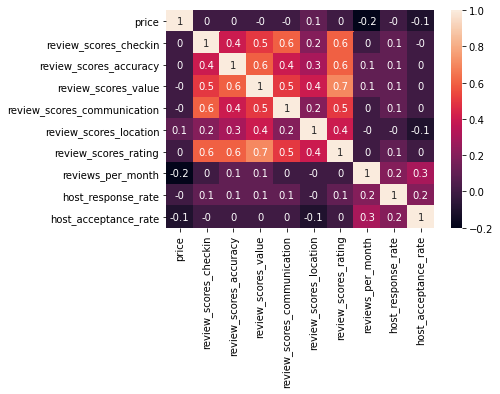

In [74]:
pr_rev = ['price',
 'review_scores_checkin',
 'review_scores_accuracy',
 'review_scores_value',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'reviews_per_month'
]
corrMatrix = round(df[pr_rev].corr(),1)
sns.heatmap(corrMatrix, annot=True)
plt.show()

<i>Будут подготовлены и могут быть использованы в моделе:</i>
- bathrooms
- bedrooms
- beds
- cleaning_fee	
- calculated_host_listings_count
- guests_included
- maximum_nights
- minimum_nights
- price
- host_since
- accommodates
- number_of_reviews

In [321]:
numeral = ['bathrooms','bedrooms','beds','cleaning_fee','calculated_host_listings_count', 'guests_included'
          , 'maximum_nights', 'minimum_nights', 'price', 'host_since', 'accommodates', 'number_of_reviews']

In [25]:
fig = go.Figure()
for i in ['bathrooms', 'bedrooms', 'beds']:
    fig.add_trace(go.Violin(x=df[i]
                    ,name = i
                    ))
fig.update_layout(
                 title_text = 'bathrooms, bedrooms, beds', height = 400)
fig.show()

In [23]:
px.histogram(df.cleaning_fee, height = 300, title='cleaning_fee')

In [26]:
px.histogram(df.calculated_host_listings_count, height = 300, title='calculated_host_listings_count')

In [27]:
px.histogram(df.price, height = 300, title='price')

In [28]:
px.histogram(df.guests_included, height = 300, title='guests_included')

In [29]:
px.violin(x=df.minimum_nights, height = 300, title='minimum_nights')

In [30]:
px.violin(x=df.maximum_nights, height = 300, title='maximum_nights')

In [322]:
df[numeral].head()

bathrooms  bedrooms  beds cleaning_fee  calculated_host_listings_count  \
0        1.0       1.0   1.0          NaN                              41   
1        1.5       1.0   1.0       $50.00                               1   
2        1.0       2.0   3.0       $75.00                               3   
3        1.0       0.0   2.0       $35.00                               4   
4        1.0       1.0   1.0       $50.00                               3   

   guests_included  maximum_nights  minimum_nights    price  host_since  \
0                2              90               3  $195.00  2013-08-14   
1                2            1125               2  $150.00  2012-01-23   
2                4              90               4  $140.00  2009-10-31   
3                0            1125               2  $110.00  2013-04-23   
4                0              14               4  $119.00  2012-07-09   

   accommodates  number_of_reviews  
0             4                  2  
1             2                  2  
2             6                 53  
3             3                 32  
4             2                  3

In [323]:
# host_since - дата с которой хосты принимают гостей. Конвертируется в количество дней, от сегодняшней даты.
df['host_since'] = (pd.to_datetime('today') - pd.to_datetime(df['host_since'])).dt.days

# В пеерменных price и cleaning_fee содержатся знаки $ и запятые в качестве разделителя тысячи (напр. $ 20,000.00 ). Они удаляются
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '').astype('float')

df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '').astype('float')

In [324]:
# Проверка типов данных (должны остаться float или int)
df[numeral].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   bathrooms                       2988 non-null   float64
 1   bedrooms                        3000 non-null   float64
 2   beds                            3003 non-null   float64
 3   cleaning_fee                    1886 non-null   float64
 4   calculated_host_listings_count  3013 non-null   int64  
 5   guests_included                 3013 non-null   int64  
 6   maximum_nights                  3013 non-null   int64  
 7   minimum_nights                  3013 non-null   int64  
 8   price                           3013 non-null   float64
 9   host_since                      3013 non-null   int64  
 10  accommodates                    3013 non-null   int64  
 11  number_of_reviews               3013 non-null   int64  
dtypes: float64(5), int64(7)
memory usa

In [325]:
# Заполнение пропусков. Количество ванных комнат, спален и кроватей заполняется  наиболее частым значением. 
# Пропущенное значение cleaning_fee означает, что комиссия за уборку отсутствует. Поэтому пропуски тут заполняются нулям
df[['bathrooms']] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['bathrooms']])
df[['bedrooms']] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['bedrooms']])
df[['beds']] = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit_transform(df[['beds']])
df[['cleaning_fee']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['cleaning_fee']])

In [281]:
round(df[numeral].describe(),1)

bathrooms  bedrooms    beds  cleaning_fee  \
count     3013.0    3013.0  3013.0        3013.0   
mean         1.3       1.2     1.7          37.2   
std          0.6       0.8     1.2          45.6   
min          0.0       0.0     1.0           0.0   
25%          1.0       1.0     1.0           0.0   
50%          1.0       1.0     1.0          25.0   
75%          1.0       1.0     2.0          55.0   
max          8.0      10.0    16.0         300.0   

       calculated_host_listings_count  guests_included  maximum_nights  \
count                          3013.0           3013.0    3.013000e+03   
mean                              3.2              1.6    7.168688e+05   
std                               6.2              1.4    3.912318e+07   
min                               1.0              0.0    1.000000e+00   
25%                               1.0              1.0    1.200000e+02   
50%                               1.0              1.0    1.125000e+03   
75%                               2.0              2.0    1.125000e+03   
max                              41.0             16.0    2.147484e+09   

       minimum_nights   price  host_since  accommodates  number_of_reviews  
count          3013.0  3013.0      3013.0        3013.0             3013.0  
mean              2.3   150.6      2624.0           3.2               15.3  
std               3.9   147.4       594.6           2.0               30.2  
min               1.0    10.0      1854.0           1.0                0.0  
25%               1.0    85.0      2157.0           2.0                1.0  
50%               2.0   115.0      2520.0           2.0                4.0  
75%               3.0   165.0      2967.0           4.0               16.0  
max             180.0  2822.0      4464.0          16.0              362.0

Числовые переменные подготовлены и приведены к необходимому формату, пропуски отсутствуют.

### Категориальные

<i> Будут удалены, поскольку содержат слишком много уникальных значений, либо не информативны, либо повторяют информацию другой переменной (например, зип-код и город, и т.д) </i>

- name
- market
- country
- country_code
- host_location
- smart_location
- state
- zipcode 
- host_neighbourhood 
- host_verifications

In [326]:
cols_to_delete = ['name', 'market', 'country', 'country_code', 'host_location', 'smart_location', 'state', 'zipcode', 'host_neighbourhood','host_verifications']

In [56]:
px.bar(df.host_neighbourhood.value_counts(), height = 300, title='host neighbourhood')

In [55]:
px.histogram(df.state, height = 300, title='state')

In [57]:
px.histogram(df.smart_location, height = 300, title='smart location')

In [58]:
px.histogram(df.host_location, height = 300, title='host_location')

In [ ]:
# Удаление текстовых колонок и тех переменных, которые было решено удалить
df = df.drop(cols_to_delete, axis = 1)
df = df.drop(text_cols, axis = 1)
df = df.drop(rates, axis = 1)
df = df.drop(reviews, axis = 1)

<i> Могут быть подготовлены как категориальные и задействованы в построении моделей: </i>

- amenities
- bed_type
- room_type
- property_type
- instant_bookable
- cancellation_policy
- city
- neighbourhood_cleansed

In [328]:
categorical = ['amenities', 'bed_type', 'room_type', 'property_type', 'instant_bookable', 'cancellation_policy',
              'city', 'neighbourhood_cleansed']

In [329]:
df[categorical].head()

amenities       bed_type  \
0                                                 {}       Real Bed   
1  {Internet,"Wireless Internet","Air Conditionin...       Real Bed   
2  {Internet,"Wireless Internet","Air Conditionin...       Real Bed   
3  {TV,"Cable TV",Internet,"Wireless Internet","A...       Real Bed   
4  {TV,"Wireless Internet","Air Conditioning",Kit...  Pull-out Sofa   

         room_type property_type instant_bookable cancellation_policy  \
0  Entire home/apt     Apartment                f              strict   
1  Entire home/apt     Apartment                f              strict   
2  Entire home/apt     Apartment                f              strict   
3  Entire home/apt     Apartment                f            flexible   
4     Private room         House                f            moderate   

         city                             neighbourhood_cleansed  
0  Washington          Union Station, Stanton Park, Kingman Park  
1  Washington     Kalorama Heights, Adams Morgan, Lanier Heights  
2  Washington                                 Shaw, Logan Circle  
3  Washington                                 Shaw, Logan Circle  
4  Washington  Columbia Heights, Mt. Pleasant, Pleasant Plain...

In [330]:
#Сводная таблица по категориальным переменным
info = []
for column in df[categorical].columns:
        vals = {"col": column,
                "na_count": df[column].isna().sum(),
               "nunique": df[column].nunique(),
               "unique": df[column].unique(),
                "type": df[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "na_count", ascending = False)

col  na_count  nunique  \
3           property_type         1       11   
0               amenities         0     2437   
1                bed_type         0        5   
2               room_type         0        3   
4        instant_bookable         0        2   
5     cancellation_policy         0        4   
6                    city         0       14   
7  neighbourhood_cleansed         0       39   

                                              unique    type  
3  [Apartment, House, Townhouse, Bed & Breakfast,...  object  
0  [{}, {Internet,"Wireless Internet","Air Condit...  object  
1    [Real Bed, Pull-out Sofa, Futon, Couch, Airbed]  object  
2       [Entire home/apt, Private room, Shared room]  object  
4                                             [f, t]  object  
5      [strict, flexible, moderate, super_strict_30]  object  
6  [Washington, Washington, D.C., Silver Spring, ...  object  
7  [Union Station, Stanton Park, Kingman Park, Ka...  object

In [85]:
px.histogram(df.bed_type, height = 300, title='bed type')

In [331]:
# Поскольку bed_type имеет в большинстве случаев Real Bed, также трансформируем данную переменную в булевую (Real Bed: 1 or 0)
df.bed_type.value_counts()
df['bed_type'] = df['bed_type'].map({'Real Bed':1, 'Futon':0,'Pull-out Sofa':0, 'Airbed':0, 'Couch':0})

In [87]:
px.histogram(df.instant_bookable, height = 300, title='instant bookable')

In [332]:
# Поскольку instant_bookable (мнгновенное бронирование) - это булевая переменная, значению "истина" присваевается 1, "ложь" - 0
df['instant_bookable'] = df['instant_bookable'].map({'f':1,'t':0})

In [12]:
px.histogram(df.property_type, height = 300, title='property type')

In [333]:
# Поскольку property_type имеет в большинстве случаев значения Apartment или House,
# вместо нее создаются две новые булевые переменные - Apartment, House. 
# Если тип жилья будет другим, то в обеих колонках будет стоять 0.
df.property_type.value_counts()

Apartment          1853
House               950
Condominium          69
Townhouse            61
Bed & Breakfast      44
Loft                 19
Other                10
Dorm                  2
Boat                  2
Cabin                 1
Bungalow              1
Name: property_type, dtype: int64

In [334]:
for i in range(df.shape[0]):
    if df.loc[i,'property_type'] == 'Apartment':
        df.loc[i,'apartment'] =1
    elif df.loc[i,'property_type']=='House':
        df.loc[i,'house'] =1

df[['apartment']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['apartment']])
df[['house']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['house']])

In [335]:
df[['apartment', 'house']]

apartment  house
0           1.0    0.0
1           1.0    0.0
2           1.0    0.0
3           1.0    0.0
4           0.0    1.0
...         ...    ...
3008        0.0    1.0
3009        1.0    0.0
3010        0.0    1.0
3011        1.0    0.0
3012        0.0    0.0

[3013 rows x 2 columns]

In [336]:
# Обновляем список категориальных переменных с внесением новых колонок
df = df.drop('property_type', axis = 1)
categorical = ['amenities',
 'bed_type',
 'room_type',
 'apartment','house',
 'instant_bookable',
 'cancellation_policy',
 'city',
 'neighbourhood_cleansed',
 'host_verifications']

In [40]:
px.histogram(df.city, height = 300, title='city')

In [337]:
# Поскольку значений "Вашингтон" в переменной "сити" блольшинство, заменим его на 1, а остальные на 0
for i in range(df.shape[0]):
    if df.loc[i,'city'] == 'Washington':
        df.loc[i,'city'] =1
    else:
        df.loc[i,'city'] =0

In [338]:
df['city']

0       1
1       1
2       1
3       1
4       1
       ..
3008    1
3009    1
3010    1
3011    1
3012    1
Name: city, Length: 3013, dtype: object

In [31]:
px.histogram(df.room_type, height = 300, title='room type')

In [339]:
# Создаются булевые переменные private_room и shared_room вместо room_type
for i in range(df.shape[0]):
    if df.loc[i,'room_type'] == 'Private room':
        df.loc[i,'private_room'] =1
    elif df.loc[i,'room_type']=='Shared room':
        df.loc[i,'shared_room'] =1

df[['shared_room']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['shared_room']])
df[['private_room']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['private_room']])

In [340]:
# Обновляем список категориальных переменных с внесением новых колонок
df = df.drop('room_type', axis = 1)
categorical = ['amenities',
 'bed_type',
 'private_room','shared_room'
 'apartment','house',
 'instant_bookable',
 'cancellation_policy',
 'city',
 'neighbourhood_cleansed',
 'host_verifications']

In [32]:
px.histogram(df.cancellation_policy, height = 300, title='cancellation policy')

In [341]:
# Создаются дамми переменные для значений cancellation_policy
for i in range(df.shape[0]):
    if df.loc[i,'cancellation_policy'] == 'strict':
        df.loc[i,'strict_cancel'] =1
    elif df.loc[i,'cancellation_policy']=='flexible':
        df.loc[i,'flexible_cancel'] =1
    elif df.loc[i,'cancellation_policy']=='moderate':
        df.loc[i,'moderate_cancel'] =1

df[['moderate_cancel']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['moderate_cancel']])
df[['flexible_cancel']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['flexible_cancel']])
df[['strict_cancel']] = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df[['strict_cancel']])

In [342]:
# Обновляем список категориальных переменных с внесением новых колонок
df = df.drop('cancellation_policy', axis = 1)
categorical = ['amenities',
 'bed_type',
 'private_room','shared_room',
 'apartment','house',
 'instant_bookable',
 'moderate_cancel', 'flexible_cancel', 'strict_cancel',
 'city',
 'neighbourhood_cleansed']

In [343]:
amn = []
for i in df.amenities:
    for j in i.split(','):
        if len(re.sub(r'[^0-9a-zA-Z]','',j))>0:
            amn.append(re.sub(r'[^0-9a-zA-Z]','',j))

In [38]:
px.histogram(amn, height = 300, title='Amneties')

In [344]:
# переменная amenities содржит списки удобств, которые присутствуют в жилье.
# Количество уникальных значений этой переменной слишком велик, поэтому эта переменная заменяется на КОЛИЧЕСТВО перечисленных удобств
for i in range(5):
    print(df.amenities[i])

{}
{Internet,"Wireless Internet","Air Conditioning",Kitchen,"Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo}
{Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer,Essentials}
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly","Smoke Detector","Fire Extinguisher",Essentials,Shampoo}
{TV,"Wireless Internet","Air Conditioning",Kitchen,"Pets live on this property",Heating,Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials}


In [345]:
lens = []
for i in df.amenities:
    amn = []
    for j in i.split(','):
        if len(re.sub(r'[^0-9a-zA-Z]','',j))>0:
            amn.append(re.sub(r'[^0-9a-zA-Z]','',j))
    lens.append(len(amn))
df.amenities = lens

In [346]:
df.amenities[:5]

0     0
1    14
2     9
3    12
4    11
Name: amenities, dtype: int64

In [39]:
px.bar(df.neighbourhood_cleansed.value_counts(), height = 300, title='neighbourhood cleansed')

In [221]:
# neighbourhood_cleansed - информация о месте расположения.
# Заменяется на булевую переменную, которая имеет знаение 1 (Тру) если локация "популярна". 
# Популярность локации определяется след. образом: считается кол-во для каждого значения, популярнуе локации имеют количество больше среднего.

In [347]:
popular_neigh = df.neighbourhood_cleansed.value_counts().to_frame().reset_index()
popular_neigh = popular_neigh.loc[(popular_neigh['neighbourhood_cleansed']>=popular_neigh['neighbourhood_cleansed'].mean()),'index']

In [348]:
df.neighbourhood_cleansed.head(10)

0            Union Station, Stanton Park, Kingman Park
1       Kalorama Heights, Adams Morgan, Lanier Heights
2                                   Shaw, Logan Circle
3                                   Shaw, Logan Circle
4    Columbia Heights, Mt. Pleasant, Pleasant Plain...
5    Woodland/Fort Stanton, Garfield Heights, Knox ...
6            Union Station, Stanton Park, Kingman Park
7            Union Station, Stanton Park, Kingman Park
8    Columbia Heights, Mt. Pleasant, Pleasant Plain...
9       Howard University, Le Droit Park, Cardozo/Shaw
Name: neighbourhood_cleansed, dtype: object

In [349]:
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].isin(popular_neigh).map({True:1,False:0})

In [306]:
df['neighbourhood_cleansed'].head(10)

0    1
1    1
2    1
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: neighbourhood_cleansed, dtype: int64

In [350]:
#Сводная таблица по категориальным переменным
info = []
for column in df[categorical].columns:
        vals = {"col": column,
                "na_count": df[column].isna().sum(),
               "nunique": df[column].nunique(),
               "unique": df[column].unique(),
                "type": df[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "na_count", ascending = False)

col  na_count  nunique  \
0                amenities         0       25   
1                 bed_type         0        2   
2             private_room         0        2   
3              shared_room         0        2   
4                apartment         0        2   
5                    house         0        2   
6         instant_bookable         0        2   
7          moderate_cancel         0        2   
8          flexible_cancel         0        2   
9            strict_cancel         0        2   
10                    city         0        2   
11  neighbourhood_cleansed         0        2   

                                               unique     type  
0   [0, 14, 9, 12, 11, 10, 16, 18, 19, 13, 17, 15,...    int64  
1                                              [1, 0]    int64  
2                                          [0.0, 1.0]  float64  
3                                          [0.0, 1.0]  float64  
4                                          [1.0, 0.0]  float64  
5                                          [0.0, 1.0]  float64  
6                                              [1, 0]    int64  
7                                          [0.0, 1.0]  float64  
8                                          [0.0, 1.0]  float64  
9                                          [1.0, 0.0]  float64  
10                                             [1, 0]   object  
11                                             [1, 0]    int64

In [351]:
#Сводная таблица по числовым переменным
info = []
for column in df[numeral].columns:
        vals = {"col": column,
                "na_count": df[column].isna().sum(),
               "nunique": df[column].nunique(),
               "unique": df[column].unique(),
                "type": df[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "na_count", ascending = False)

col  na_count  nunique  \
0                        bathrooms         0       13   
1                         bedrooms         0        9   
2                             beds         0       13   
3                     cleaning_fee         0       82   
4   calculated_host_listings_count         0       18   
5                  guests_included         0       14   
6                   maximum_nights         0       90   
7                   minimum_nights         0       17   
8                            price         0      268   
9                       host_since         0     1252   
10                    accommodates         0       16   
11               number_of_reviews         0      156   

                                               unique     type  
0   [1.0, 1.5, 2.5, 2.0, 0.0, 3.5, 4.0, 3.0, 4.5, ...  float64  
1      [1.0, 2.0, 0.0, 3.0, 5.0, 4.0, 6.0, 8.0, 10.0]  float64  
2   [1.0, 3.0, 2.0, 5.0, 4.0, 6.0, 7.0, 8.0, 13.0,...  float64  
3   [0.0, 50.0, 75.0, 35.0, 90.0, 20.0, 30.0, 25.0...  float64  
4   [41, 1, 3, 4, 5, 7, 23, 2, 19, 12, 8, 22, 6, 2...    int64  
5      [2, 4, 0, 1, 6, 3, 12, 7, 5, 8, 10, 13, 16, 9]    int64  
6   [90, 1125, 14, 28, 3, 8, 365, 1000, 29, 61, 5,...    int64  
7   [3, 2, 4, 1, 10, 6, 7, 14, 5, 25, 21, 15, 9, 2...    int64  
8   [195.0, 150.0, 140.0, 110.0, 119.0, 49.0, 149....  float64  
9   [2632, 3201, 4015, 2745, 3033, 3046, 1920, 256...    int64  
10  [4, 2, 6, 3, 1, 7, 5, 8, 14, 12, 10, 9, 11, 13...    int64  
11  [2, 53, 32, 3, 1, 0, 33, 4, 11, 18, 27, 23, 21...    int64

Категориальнае переменные также подготовлены и не имеют пропусков. 

In [352]:
categorical.append('price')

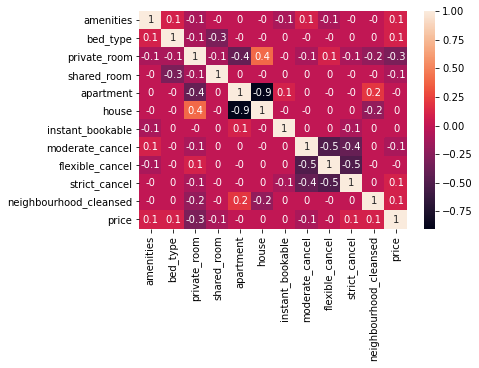

In [353]:
corrMatrix = round(df[categorical].corr(),1)
sns.heatmap(corrMatrix, annot=True)
plt.show()

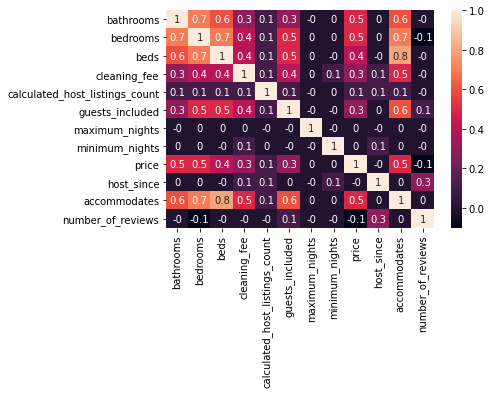

In [354]:
corrMatrix = round(df[numeral].corr(),1)
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [311]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [355]:
# Outliers
df[numeral] = outliers(df[numeral])
df.describe()

<ipython-input-311-9e74572d1efa>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-311-9e74572d1efa>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



host_since  neighbourhood_cleansed  accommodates    bathrooms  \
count  3013.000000              3013.00000   3013.000000  3013.000000   
mean   2623.953177                 0.78991      3.152015     1.234044   
std     594.440620                 0.40744      1.811690     0.500303   
min    1854.000000                 0.00000      1.000000     0.000000   
25%    2157.000000                 1.00000      2.000000     1.000000   
50%    2520.000000                 1.00000      2.000000     1.000000   
75%    2967.000000                 1.00000      4.000000     1.000000   
max    4407.641024                 1.00000      9.294529     3.013747   

          bedrooms         beds     bed_type    amenities        price  \
count  3013.000000  3013.000000  3013.000000  3013.000000  3013.000000   
mean      1.191200     1.613771     0.959177    13.365417   144.455691   
std       0.751843     0.978213     0.197913     3.847555   100.656553   
min       0.000000     1.000000     0.000000     0.000000    10.000000   
25%       1.000000     1.000000     1.000000    11.000000    85.000000   
50%       1.000000     1.000000     1.000000    14.000000   115.000000   
75%       1.000000     2.000000     1.000000    16.000000   165.000000   
max       3.734761     5.256614     1.000000    26.000000   592.666575   

       cleaning_fee  ...  instant_bookable  calculated_host_listings_count  \
count   3013.000000  ...       3013.000000                     3013.000000   
mean      36.585762  ...          0.895121                        2.878892   
std       43.180179  ...          0.306448                        4.585348   
min        0.000000  ...          0.000000                        1.000000   
25%        0.000000  ...          1.000000                        1.000000   
50%       25.000000  ...          1.000000                        1.000000   
75%       55.000000  ...          1.000000                        2.000000   
max      173.962522  ...          1.000000                       21.770801   

       reviews_per_month    apartment        house  private_room  shared_room  \
count        2341.000000  3013.000000  3013.000000   3013.000000  3013.000000   
mean            1.804216     0.615002     0.315300      0.319947     0.026884   
std             1.754306     0.486676     0.464713      0.466533     0.161770   
min             0.010000     0.000000     0.000000      0.000000     0.000000   
25%             0.560000     0.000000     0.000000      0.000000     0.000000   
50%             1.120000     1.000000     0.000000      0.000000     0.000000   
75%             2.530000     1.000000     1.000000      1.000000     0.000000   
max            10.430000     1.000000     1.000000      1.000000     1.000000   

       strict_cancel  flexible_cancel  moderate_cancel  
count    3013.000000      3013.000000      3013.000000  
mean        0.324593         0.362761         0.295055  
std         0.468300         0.480877         0.456143  
min         0.000000         0.000000         0.000000  
25%         0.000000         0.000000         0.000000  
50%         0.000000         0.000000         0.000000  
75%         1.000000         1.000000         1.000000  
max         1.000000         1.000000         1.000000  

[8 rows x 31 columns]

In [357]:
df = df[['price','host_since', 'neighbourhood_cleansed', 'city', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
       'cleaning_fee', 'guests_included', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month', 'apartment',
       'house', 'private_room', 'shared_room', 'strict_cancel',
       'flexible_cancel', 'moderate_cancel']]

In [216]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [217]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [363]:
# Exporting the dataset
df.to_csv('airbnb_prep.csv', sep=';', index=False)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3013 entries, 0 to 3012
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           3013 non-null   float64
 1   host_since                      3013 non-null   float64
 2   neighbourhood_cleansed          3013 non-null   int64  
 3   city                            3013 non-null   object 
 4   accommodates                    3013 non-null   float64
 5   bathrooms                       3013 non-null   float64
 6   bedrooms                        3013 non-null   float64
 7   beds                            3013 non-null   float64
 8   bed_type                        3013 non-null   int64  
 9   amenities                       3013 non-null   int64  
 10  cleaning_fee                    3013 non-null   float64
 11  guests_included                 3013 non-null   float64
 12  minimum_nights                  30